# Linear Regression with PyTorch

This tutorial demonstrates how to implement linear regression using PyTorch neural networks. You'll learn how to create a simple network, train it with gradient descent, and save/load models.

**Tutorial based on:** https://youtu.be/Z_ikDlimN6A?si=XRdQHs4hqWuFlWTM

## Learning Objectives
1. Build a simple linear regression neural network
2. Understand the training loop with gradient descent
3. Visualize training progress and results
4. Learn model persistence (saving and loading)

In [72]:
# Import PyTorch and visualization libraries
import torch                    # Core PyTorch library for tensors and neural networks
import torch.nn as nn          # Neural network modules and loss functions
import matplotlib.pyplot as plt # For plotting graphs and visualizations

In [73]:
# Generate synthetic data for linear regression (y = 5x + 2)
# These are the TRUE parameters we want our network to learn
weight = 5  # True slope
bias = 2    # True y-intercept

# Create input data: 50 evenly spaced points between 0 and 1
input_data = torch.linspace(0, 1, 50)

# Generate perfect linear data using the true parameters
output_data = weight * input_data + bias

# Split data into training (80%) and evaluation (20%) sets
training_input_data = input_data[:40]    # First 40 points for training
training_output_data = output_data[:40]

evaluation_input_data = input_data[40:]  # Last 10 points for testing
evaluation_output_data = output_data[40:]

print(f"Training set size: {len(training_input_data)}")
print(f"Evaluation set size: {len(evaluation_input_data)}")
print(f"True parameters - Weight: {weight}, Bias: {bias}")

Training set size: 40
Evaluation set size: 10
True parameters - Weight: 5, Bias: 2


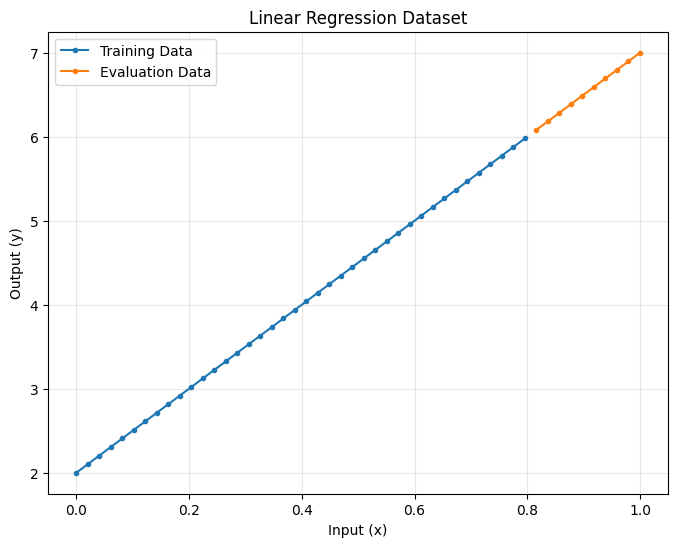

In [74]:
# Visualize the training and evaluation data
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(training_input_data, training_output_data, marker=".", label="Training Data")
ax.plot(evaluation_input_data, evaluation_output_data, marker=".", label="Evaluation Data")
ax.set_xlabel("Input (x)")
ax.set_ylabel("Output (y)")
ax.set_title("Linear Regression Dataset")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [75]:
class Net(nn.Module):
    """
    A simple linear regression neural network.
    This implements the equation: y = weight * x + bias
    """
    def __init__(self):
        super().__init__()  # Initialize the parent nn.Module class
        
        # Create learnable parameters (randomly initialized)
        # nn.Parameter tells PyTorch these values should be updated during training
        self.weight = nn.Parameter(torch.randn(1))  # Random weight (slope)
        self.bias = nn.Parameter(torch.randn(1))    # Random bias (y-intercept)

    def forward(self, x):
        """
        Forward pass: compute the network's prediction
        Args:
            x: Input tensor
        Returns:
            Linear transformation: weight * x + bias
        """
        return self.weight * x + self.bias

In [76]:
# Create an instance of our network with random parameters
net = Net()

# Make predictions on training data BEFORE training (these will be poor)
predicted = net(training_input_data)

print("Initial network parameters:")
print(f"  Weight: {net.weight.item():.4f}")
print(f"  Bias: {net.bias.item():.4f}")
print(f"  (Remember: true values are weight=5, bias=2)")
print(f"\nFirst few predictions: {predicted.detach()[:5]}")

predicted

Initial network parameters:
  Weight: -1.1229
  Bias: -0.1863
  (Remember: true values are weight=5, bias=2)

First few predictions: tensor([-0.1863, -0.2092, -0.2322, -0.2551, -0.2780])


tensor([-0.1863, -0.2092, -0.2322, -0.2551, -0.2780, -0.3009, -0.3238, -0.3467,
        -0.3697, -0.3926, -0.4155, -0.4384, -0.4613, -0.4842, -0.5071, -0.5301,
        -0.5530, -0.5759, -0.5988, -0.6217, -0.6446, -0.6676, -0.6905, -0.7134,
        -0.7363, -0.7592, -0.7821, -0.8050, -0.8280, -0.8509, -0.8738, -0.8967,
        -0.9196, -0.9425, -0.9655, -0.9884, -1.0113, -1.0342, -1.0571, -1.0800],
       grad_fn=<AddBackward0>)

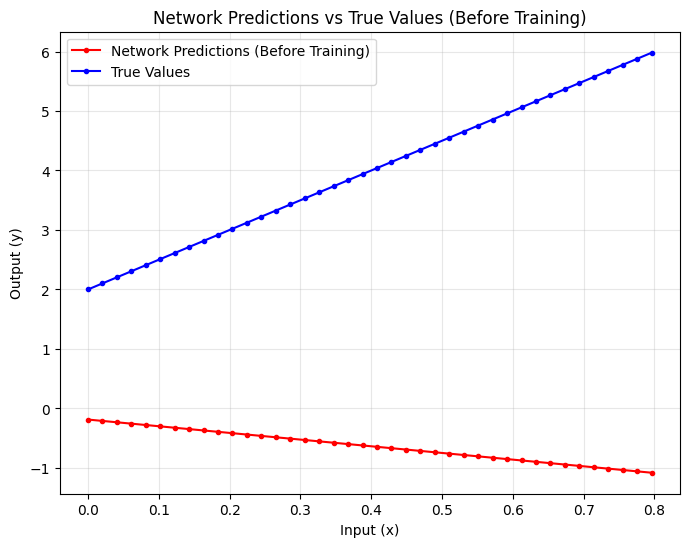

In [77]:
# Compare predictions vs true values BEFORE training
fig, ax = plt.subplots(figsize=(8, 6))

# Plot predictions (what the network currently thinks)
ax.plot(training_input_data, predicted.detach(), marker=".", label="Network Predictions (Before Training)", color="red")
# Plot true values (what we want the network to learn)
ax.plot(training_input_data, training_output_data, marker=".", label="True Values", color="blue")

ax.set_xlabel("Input (x)")
ax.set_ylabel("Output (y)")
ax.set_title("Network Predictions vs True Values (Before Training)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [78]:
# Training configuration
epochs = 5000     # Number of training iterations
lr = 0.01        # Learning rate - how big steps to take when updating parameters

# Set manual seed for reproducible results (since parameters are randomly initialized)
torch.manual_seed(42)
net = Net()  # Create fresh network with seed

# Create optimizer: SGD (Stochastic Gradient Descent) will update our network's parameters
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# Create loss function: L1Loss measures absolute difference between predictions and targets
loss_fn = nn.L1Loss()

print("Starting training...")
print(f"Initial parameters - Weight: {net.weight.item():.4f}, Bias: {net.bias.item():.4f}")

# Training loop: repeat this process to gradually improve the network
for epoch in range(epochs):
    # 1. FORWARD PASS: Make predictions using current parameters
    predictions = net(training_input_data)
    
    # 2. COMPUTE LOSS: How wrong are our predictions?
    loss = loss_fn(predictions, training_output_data)
    
    # 3. BACKWARD PASS: Calculate gradients (how to adjust parameters)
    loss.backward()
    
    # 4. UPDATE PARAMETERS: Adjust weights and bias based on gradients
    optimizer.step()
    
    # 5. RESET GRADIENTS: Clear gradients for next iteration
    optimizer.zero_grad()
    
    # Print progress every 100 epochs
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:4d}: Loss = {loss.item():.6f}, Weight = {net.weight.item():.4f}, Bias = {net.bias.item():.4f}")

print(f"\nTraining complete!")
print(f"Final parameters - Weight: {net.weight.item():.4f}, Bias: {net.bias.item():.4f}")
print(f"Target parameters - Weight: 5.0000, Bias: 2.0000")

Starting training...
Initial parameters - Weight: 0.3367, Bias: 0.1288
Epoch    0: Loss = 3.726997, Weight = 0.3407, Bias = 0.1388
Epoch  100: Loss = 2.568627, Weight = 0.7386, Bias = 1.1388
Epoch  200: Loss = 1.426408, Weight = 1.1365, Bias = 2.1298
Epoch  300: Loss = 0.847494, Weight = 1.5088, Bias = 2.7758
Epoch  400: Loss = 0.669424, Weight = 1.8079, Bias = 3.0588
Epoch  500: Loss = 0.603517, Weight = 2.0451, Bias = 3.1468
Epoch  600: Loss = 0.563307, Weight = 2.2435, Bias = 3.1328
Epoch  700: Loss = 0.527070, Weight = 2.4271, Bias = 3.0828
Epoch  800: Loss = 0.491049, Weight = 2.6076, Bias = 3.0253
Epoch  900: Loss = 0.455504, Weight = 2.7808, Bias = 2.9508
Epoch 1000: Loss = 0.419965, Weight = 2.9541, Bias = 2.8766
Epoch 1100: Loss = 0.384430, Weight = 3.1274, Bias = 2.8026
Epoch 1200: Loss = 0.348888, Weight = 3.3006, Bias = 2.7281
Epoch 1300: Loss = 0.313351, Weight = 3.4740, Bias = 2.6541
Epoch 1400: Loss = 0.277811, Weight = 3.6472, Bias = 2.5796
Epoch 1500: Loss = 0.242272, 

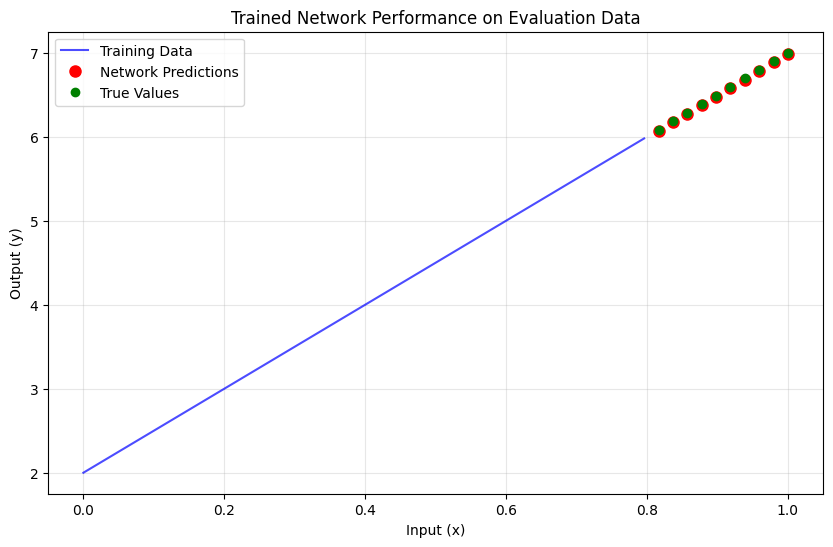

Evaluation Results:
Input: 0.82 | True: 6.082 | Predicted: 6.069 | Error: 0.012
Input: 0.84 | True: 6.184 | Predicted: 6.171 | Error: 0.012
Input: 0.86 | True: 6.286 | Predicted: 6.273 | Error: 0.013
Input: 0.88 | True: 6.388 | Predicted: 6.375 | Error: 0.013
Input: 0.90 | True: 6.490 | Predicted: 6.477 | Error: 0.013
Input: 0.92 | True: 6.592 | Predicted: 6.579 | Error: 0.013
Input: 0.94 | True: 6.694 | Predicted: 6.681 | Error: 0.013
Input: 0.96 | True: 6.796 | Predicted: 6.783 | Error: 0.013
Input: 0.98 | True: 6.898 | Predicted: 6.884 | Error: 0.014
Input: 1.00 | True: 7.000 | Predicted: 6.986 | Error: 0.014


In [79]:
# Test the trained network on evaluation data (data it hasn't seen during training)
evaluate_output = net(evaluation_input_data)

# Visualize how well our trained network performs
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training data (what the network learned from)
ax.plot(training_input_data, training_output_data, 'b-', label="Training Data", alpha=0.7)

# Plot network's predictions on evaluation data
ax.plot(evaluation_input_data, evaluate_output.detach(), 'ro', label="Network Predictions", markersize=8)

# Plot true values for evaluation data
ax.plot(evaluation_input_data, evaluation_output_data, 'go', label="True Values", markersize=6)

ax.set_xlabel("Input (x)")
ax.set_ylabel("Output (y)")
ax.set_title("Trained Network Performance on Evaluation Data")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("Evaluation Results:")
for i in range(len(evaluation_input_data)):
    true_val = evaluation_output_data[i].item()
    pred_val = evaluate_output[i].item()
    error = abs(true_val - pred_val)
    print(f"Input: {evaluation_input_data[i]:.2f} | True: {true_val:.3f} | Predicted: {pred_val:.3f} | Error: {error:.3f}")

In [80]:
# Check final evaluation loss and inspect learned parameters
final_loss = nn.L1Loss()(evaluate_output, evaluation_output_data)
print(f"Final evaluation loss: {final_loss.item():.6f}")

# Examine the learned parameters
learned_params = list(net.parameters())
print(f"\nLearned parameters:")
print(f"  Weight (slope): {learned_params[0].item():.4f}")
print(f"  Bias (intercept): {learned_params[1].item():.4f}")

learned_params

Final evaluation loss: 0.012974

Learned parameters:
  Weight (slope): 4.9922
  Bias (intercept): 1.9941


[Parameter containing:
 tensor([4.9922], requires_grad=True),
 Parameter containing:
 tensor([1.9941], requires_grad=True)]

In [81]:
# Understanding model state_dict: the parameters that define our trained model
print("Model's state_dict (trained parameters):")
for param_name in net.state_dict():
    param_value = net.state_dict()[param_name]
    print(f"  {param_name}: {param_value.item():.4f} (shape: {param_value.size()})")

# The state_dict contains all learnable parameters - this is what gets saved/loaded

Model's state_dict (trained parameters):
  weight: 4.9922 (shape: torch.Size([1]))
  bias: 1.9941 (shape: torch.Size([1]))


In [82]:
# Understanding optimizer state_dict: tracks training-related information
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(f"  {var_name}: {optimizer.state_dict()[var_name]}")

# The optimizer remembers learning rate, momentum, etc. 
# For simple SGD, it's mostly just configuration (no momentum history)

Optimizer's state_dict:
  state: {}
  param_groups: [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [83]:
# Save the trained model parameters to disk
# This saves only the state_dict (parameters), not the entire model structure
torch.save(net.state_dict(), "./linear_regression.pth")
print("Model saved to 'linear_regression.pth'")
print("This file contains the learned weight and bias values.")

Model saved to 'linear_regression.pth'
This file contains the learned weight and bias values.


In [84]:
# Load a saved model: demonstrate how to restore trained parameters
# Step 1: Create a new instance of the network architecture (with random parameters)
loaded_net = Net()
print("New network before loading:")
print(f"  Weight: {loaded_net.weight.item():.4f}, Bias: {loaded_net.bias.item():.4f}")

# Step 2: Load the saved parameters into the network
loaded_net.load_state_dict(torch.load("./linear_regression.pth", weights_only=True))
print("Network after loading saved parameters:")
print(f"  Weight: {loaded_net.weight.item():.4f}, Bias: {loaded_net.bias.item():.4f}")

# weights_only=True is recommended for security (only loads model parameters)

New network before loading:
  Weight: 0.2345, Bias: 0.2303
Network after loading saved parameters:
  Weight: 4.9922, Bias: 1.9941


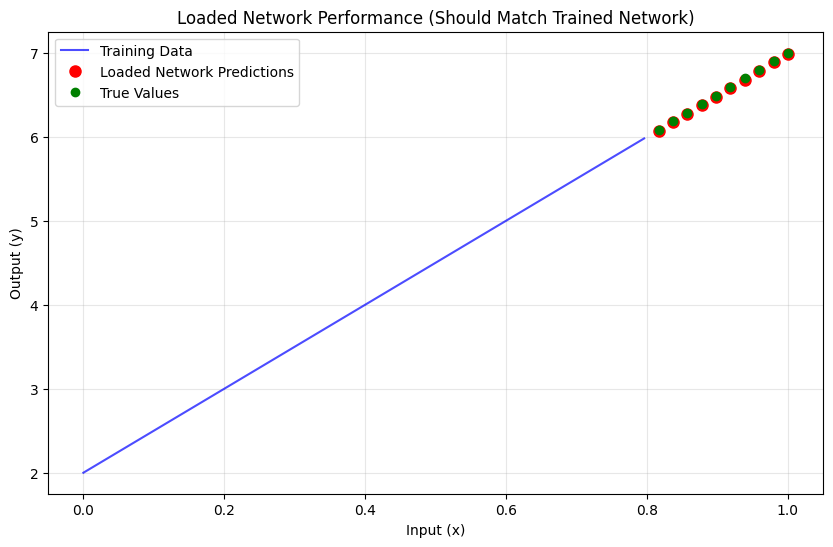

Verification: Loaded network produces identical results to original trained network
Difference between loaded and original predictions: 0.0000000000
(Should be 0.0000000000 or very close to it)


In [85]:
# Test the loaded network to verify it works identically to the original
output_loaded = loaded_net(evaluation_input_data)

# Visualize loaded network performance (should be identical to trained network)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(training_input_data, training_output_data, 'b-', label="Training Data", alpha=0.7)
ax.plot(evaluation_input_data, output_loaded.detach(), 'ro', label="Loaded Network Predictions", markersize=8)
ax.plot(evaluation_input_data, evaluation_output_data, 'go', label="True Values", markersize=6)

ax.set_xlabel("Input (x)")
ax.set_ylabel("Output (y)")
ax.set_title("Loaded Network Performance (Should Match Trained Network)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Verify the loaded network produces identical results
print("Verification: Loaded network produces identical results to original trained network")
difference = torch.sum(torch.abs(output_loaded - evaluate_output))
print(f"Difference between loaded and original predictions: {difference.item():.10f}")
print("(Should be 0.0000000000 or very close to it)")